<a href="https://colab.research.google.com/github/mohanafathollahi/lab5_IRRS/blob/main/IRRS_Lab5_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

General Networkx documentation: https://networkx.org/documentation/stable/reference/introduction.html

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In this first section, your task is to do two of the three following alternatives:

1. Plot the clustering coefficient and the average shortest-path as a function of the parameter p of the WS model.
2. Plot the average shortest-path length as a function of the network size of the ER model.
3. Plot a histogram of the degree distribution of a BA network. What distribution does
this follow? Can you describe it

## WS Model
References:
* Wikipedia Watts-Strogatz model: https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model
* Networkx watts_strogatz_graph generator: https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html
* Networkx clustering: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html
* Networkx average_clustering: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.clustering_coefficient.average_clustering.html
* Networkx average_shortest_path_length: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html

In [ ]:

def Simulations_WS(n, k, p_array, seeds):
  """
  Runs simulations on the Watts-Strogatz graph using the defined 
  initial parameters for graph generation.
  n: the number of nodes
  k: each node is joined with k nearest neighbors in ring topology
  p_array: an array of probabilities to use for rewiring during graph generation
  seeds: a list of random seeds where the length is the number of simulations
  
  Returns the average shortest path and average clustering coefficient for each
  probability across all simulations.
  """
  simulations_clust = []
  simulations_path = []
  for seed in seeds:
    clust_p = []
    path_p = []
    for p in p_array:
      G = nx.watts_strogatz_graph(n, k, p, seed=seed)
      clust_p.append(nx.average_clustering(G))
      path_p.append(nx.average_shortest_path_length(G))
    simulations_clust.append(clust_p)
    simulations_path.append(path_p)
  # convert the lists of simulation results to np arrays
  simulations_clust_np =np.array([np.array(sim) for sim in simulations_clust])
  simulations_path_np =np.array([np.array(sim) for sim in simulations_path])
  # compute the mean of each probability across simulations
  average_path = simulations_path_np.mean(axis=0)
  average_clust = simulations_clust_np.mean(axis=0)
  return average_path, average_clust

Random graphs require many simulations to be averaged in order to draw conclusions about the properties.

In [ ]:
# creating the array of probabilities to test
p_array = np.geomspace(0.0001,1,15)
p_array = np.insert(p_array, 0, 0)
# creating seeds for 20 simulations
seeds = list(range(1,21))
n = 1000
k = 4

In [ ]:
# this takes around 8 minutes with 20 simulations
average_path, average_clust = Simulations_WS(n,k,p_array, seeds)

In [ ]:
clust_p_scaled = average_clust/average_clust[0]
path_p_scaled = average_path/average_path[0]

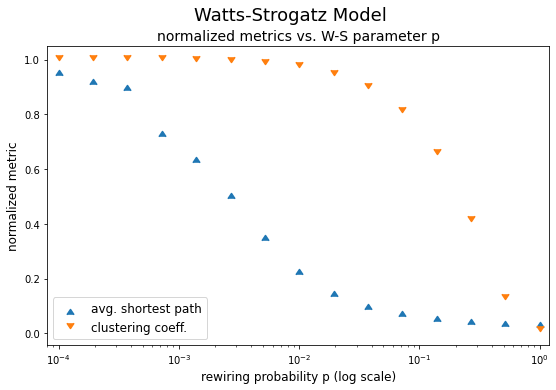

In [ ]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(5.5)
plt.scatter(x=p_array, y=path_p_scaled, marker=6, s=50)
plt.scatter(x=p_array, y=clust_p_scaled, marker=7, s=50)
plt.suptitle('Watts-Strogatz Model', size=18)
plt.title('normalized metrics vs. W-S parameter p', size=14)
plt.xlabel('rewiring probability p (log scale)', size=12)
plt.ylabel('normalized metric', size=12)
plt.xscale('log')
plt.xlim([.00008, 1.2])
plt.legend(labels=['avg. shortest path', 'clustering coeff.'], loc='lower left',prop={'size': 12})
plt.show()
f.savefig(fname='WS_plot.png', format='png')

## ER Model

References:
* Networkx Erdos-Renyi Generator https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html
* Wikipedia Erdos-Renyi graph https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model
* Networkx average_shortest_path_length: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html

We need $\epsilon = 0.6$ in order for the graph to be connected with all seeds 1-10 with a graph of 100 nodes.

In [14]:
def Simulations_ER(n, seeds):
  """
  Runs simulations on the Erdos-Renyi graph using the defined 
  initial parameters for graph generation.
  n: the number of nodes for the graph
  seeds: a list of random seeds where the length is the number of simulations  
  Returns the average shortest path for each graph size across all simulations.
  """
  simulations_path = []
  for seed in seeds:
    #path_n = []
    #for n in n_array:
    epsilon = .6
    p = ((1+epsilon)*np.log(n))/n
    G = nx.erdos_renyi_graph(n, p, seed=seed, directed=False)
    if nx.is_connected(G):
      path_n = nx.average_shortest_path_length(G)
      #path_n.append(nx.average_shortest_path_length(G))
      simulations_path.append(path_n)
    else:
      print(str(G) + ' with seed', str(seed), 'is not connected.')
  # convert the lists of simulation results to np arrays
  simulations_path_np =np.array([np.array(sim) for sim in simulations_path])
  # compute the mean of each probability across simulations
  average_path = simulations_path_np.mean(axis=0)
  return average_path

In [15]:
# creating the array of network sizes to test
n_array = np.geomspace(50,40000,10)
n_array = np.int_(np.round_(n_array,-1))
n_array

array([   50,   110,   220,   460,   980,  2050,  4310,  9060, 19030,
       40000])

In [16]:
# creating x and y vectors for  plotting later
x=[]
y=[]

In [17]:
n = 50
seeds = list(range(1,11))
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

Graph with 50 nodes and 151 edges with seed 4 is not connected.


In [18]:
n = 110
seeds = list(range(1,11))
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

In [19]:
n = 220
seeds = list(range(1,11))
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

In [20]:
n = 460
seeds = list(range(1,11))
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

In [21]:
n = 980
seeds = list(range(1,11))
# 13 seconds to run 10 simulations
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

In [22]:
n = 2050
seeds = list(range(1,11))
# 1 minute to run 10 simulations
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

In [23]:
n = 4310
seeds = list(range(1,6))
# 3 minutes to run 5 simulations
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

In [24]:
n = 9060
seeds = list(range(1,3))
# 6 minutes to run 2 simulations
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

In [32]:
n = 19030
seeds = list(range(1,2))
# 13 minutes to run 1 simulation
average_path = Simulations_ER(n, seeds)
x.append(n)
y.append(average_path)

In [25]:
#n = 40000
#seeds = list(range(1,2))
## 40 minutes running and didn't finish
#average_path_40k = Simulations_ER(n, seeds)
#average_path_40k

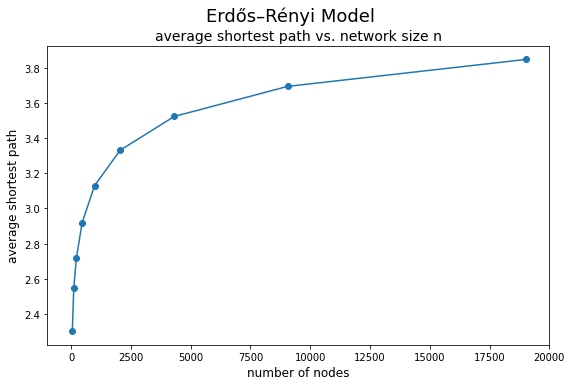

In [41]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(5.5)
plt.plot(x, y, '-o')
plt.suptitle('Erdős–Rényi Model', size=18)
plt.title('average shortest path vs. network size n', size=14)
plt.xlabel('number of nodes', size=12)
plt.ylabel('average shortest path', size=12)
#plt.xscale('log')
plt.xlim([-1000, 20000])
plt.show()
f.savefig(fname='ER_plot.png', format='png')